# 1.A Comprenez comment un ordinateur voit une image 

### -> Une fonction de l'intensité

Une image est une **fonction qui quantifie l'intensité lumineuse de n'importe quel point dans l'image**. Dans une image en noir et blanc, l'intensité est le niveau de gris : plus un point est sombre, plus son niveau de gris est faible.

Comme une image est une surface délimitée du plan, on peut se munir d'un **repère cartésien** et repérer la position de ses points par les coordonnées (x,y), avec x son abscisse et y son ordonnée. Plus formellement, l'image comme fonction mathématique s’écrit comme ceci [en noir et blanc]

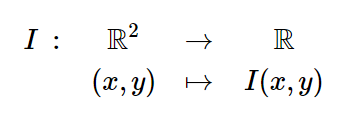

In [2]:
from IPython.display import Image
Image(filename="pictures/1.A.1.PNG") 

En **couleurs**, une image est un mélange des **trois couleurs primaires (rouge, vert et bleu)** - ce qui correspond non plus à une seule fonction mais trois fonctions $r(x,y)$ , $g(x,y)$ et $b(x,y)$ -> **modèle de l'espace RGB (Red Green Blue)**

L'image est représentée comme une fonction vectorielle :

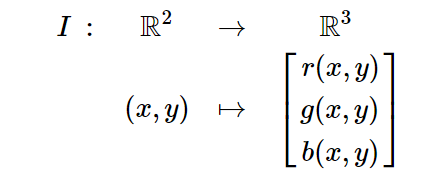

In [3]:
from IPython.display import Image
Image(filename="pictures/1.A.2.PNG") 

### -> Domaine de définition

Le **domaine de définition**:
    - h: Height
    - w : Width

### -> Discrétisation ou Numérisation

Dans notre définition mathématique, l'abscisse, l'ordonnée et l'intensité d'un point donné de l'image peuvent prendre n'importe quelle valeur réelle -> **modèle continu** ou **image analogique**. L'intensité lumineuse doit être définie en tout point du rectangle de dimension h×w 

Cette définition mathématique ajustée présente toutefois **des limites d'un point de vue pratique**, car elle suppose que **l'intensité lumineuse doit être définie en tout point du rectangle de dimension h×w.**

        - Les capteurs des caméras et même nos yeux ne sont pas capables d'effectuer une infinité de mesures, à cause de leur résolution limitée
        - Un Ordinateur ne peut comprendre que des données numériques -> i.e. discrètes qui présentent un nombre fini de valeur
        
Une image en informatique est ainsi une **discrétisation** – ou **numérisation** – de notre modèle continu : on l'appelle **image numérique**. Cette discrétisation se fait à la fois : 
        sur **l'ensemble de définition** de la fonction image (**échantillonnage**, ou sampling en anglais) 
        et sur son **ensemble d'arrivée** (**quantification**).

### -> Echantillonage *[ensemble de définition]* & Quantification *[ensemble d'arrivée]*

**L'échantillonnage** consiste à découper notre image continue suivant une grille régulière et à **associer une intensité à chacune de ses cellules**, appelées **pixels** (contraction des mots anglais picture element). En d'autres termes, on procède à **une discrétisation spatiale : seul un nombre fini de points de l'image continue est conservé**.

**La quantification** consiste, quant à elle, à **limiter le nombre de valeurs différentes que peut prendre l'intensité**. Par exemple, les niveaux de gris concernent uniquement les entiers compris entre 0 (noir) et 255 (blanc), et les couleurs dans le modèle RGB sont déterminées par un triplet de niveaux de gris (rouge : (255,0,0), vert : (0,255,0) et bleu : (0,0,255)).

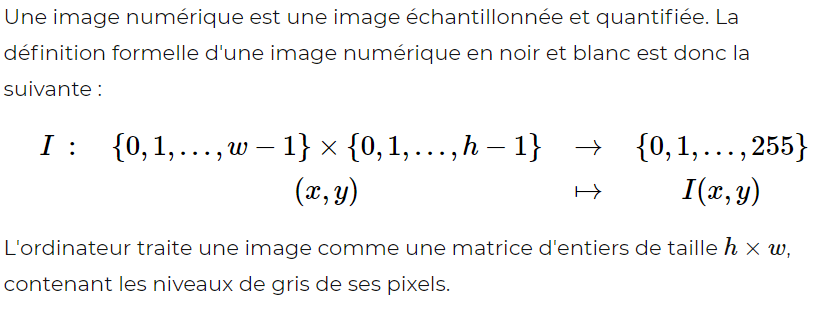

In [4]:
from IPython.display import Image
Image(filename="pictures/1.A.3.PNG") 

### -> Définition vs. Résolution

Une image numérique est caractérisée par sa **définition** et sa **résolution**.  

La **définition** correspond à la **donnée hauteur × largeur** exprimée en pixels > En gros combien y'a t'il de petits carrés dans mon image ? 

La **résolution** désigne *le nombre de pixels par unité de longueur de l'image analogique*. Elle permet de mesurer la *qualité de l'image obtenue après numérisation* : **plus la résolution est élevée, meilleure est la qualité de l'image**. 

Le **nombre de mégapixels** (1 mégapixel = 1 million de pixels) mis en avant par les fabricants d'appareils photos **exprime la définition, et non la résolution.** Par exemple, une définition de 6000 × 4000 équivaut à 24 mégapixels.

Ne vous laissez plus berner : **un plus grand nombre de mégapixels donne des photos de plus grande taille, mais pas forcément de meilleure qualité !**

### -> JPEG vs. PNG vs. TIFF

La différence se fait au niveau de la **compression de l'image** : la suite de bits représentant l'image numérique est transformée dans le fichier en une suite de bits plus courte, exprimant exactement les mêmes informations **(compression sans perte de données, comme PNG et TIFF)** ou des **informations proches (compression avec pertes, comme JPEG)**

In [12]:
from PIL import Image

# Charger l'image
img = Image.open("pictures/simba.PNG") 

# Afficher l'image chargée
img.show()

In [13]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 250 px, hauteur : 263 px


Ce résultat signifie que l'image analogique a été découpée en **250 pixels** sur la **largeur** et **263 pixels** sur la **hauteur** pendant **l'échantillonnage**.

    - **Image.mode** informe sur le **format de pixel utilisé**, autrement dit sur la façon dont **la quantification a été faite**. 
    
    - **Image.getpixel** permet de récupérer **l'intensité associée au pixel** à une position donnée.

In [14]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : L
Valeur du pixel situé en (20,100) : 196


**Le mode 'L'** signifie que les intensités sont **codées sur 8 bits**, ce qui est équivalent aux **256 niveaux de gris d'une image en noir et blanc**

-> https://pillow.readthedocs.io/en/3.1.x/handbook/concepts.html#concept-modes

La méthode **Image.getpixel**  prend en argument un tuple, dont la **première valeur indique l'abscisse du pixel** et la **deuxième, son ordonnée**. Par convention dans Pillow, **le repère cartésien a pour origine le pixel le plus en haut à gauche de l'image, et l'axe des ordonnées est orienté vers le bas.** 

In [15]:
# Récupérer d'un seul coup les valeurs de tous les pixels de l'image

import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

Taille de la matrice de pixels : (263, 250)


In [17]:
mat

array([[247, 245, 245, ..., 224, 228, 228],
       [246, 244, 243, ..., 228, 230, 230],
       [244, 242, 240, ..., 230, 231, 231],
       ...,
       [183, 169, 169, ..., 108,  95, 102],
       [170, 160, 171, ...,  81,  95,  99],
       [150, 155, 174, ..., 133, 115, 111]], dtype=uint8)

# 1.B Appliquez vos premiers traitements d'images

1. Etirements d'histogramme
2. Egalisation d'histogramme
3. Transofrmations géométriques
4. Elimination du bruit

**Trois types de bruits**: 

- Bruit Gaussien
- Speckle
- Poivre et Sel

### Histogrammes

La modification d'histogrammes -> **traitements ponctuels**

L'histogramme d'une image numérique est une **courbe statistique représentant la répartition de ses pixels selon leur intensité**. Pour une image en noir et blanc, il indique en **abscisse le niveau de gris (entier entre 0 et 255)** et **en ordonnée, le nombre de pixels ayant cette valeur**.

Lorsque **l'histogramme est normalisé, il indique en ordonnée la probabilité pi de trouver un pixel de niveau de gris i dans l'image**

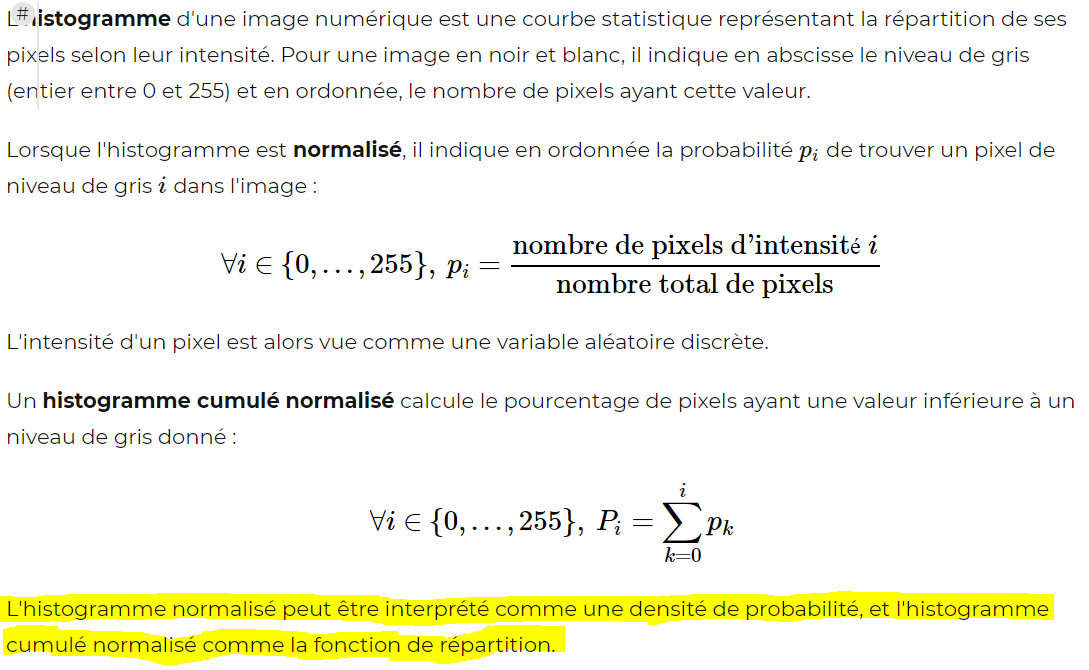

In [18]:
from IPython.display import Image
Image(filename="pictures/1.B.1.PNG")

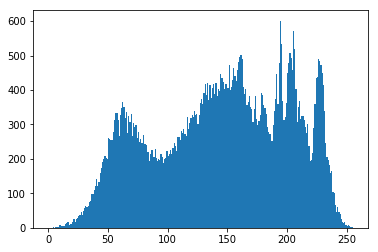

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Charger l'image comme matrice de pixels
img = np.array(Image.open('pictures/simba.png'))

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

Sa modification permet d'**ajuster la dynamique des niveaux de gris ou des couleurs** dans une image

Grossièrement, **à gauche se situent les pixels noirs**, **à droite les pixels blancs**, et au **milieu, toutes les nuances de gris**.

### Etirements d'histogramme

**Quand l'utiliser ?** Corriger la luminosité, ou exposition, de l'image

- L'image trop sombre, ou sous-exposée, la majorité des pixels se situent dans la partie gauche de l'histogramme, vers les valeurs de niveaux de gris faibles.

- Les pixels de l'image trop claire, ou sur-exposée, se concentrent dans la partie droite de l'histogramme.

**L’histogramme associé à l’image dont l’exposition est relativement bonne présente une répartition des pixels sur tout l’intervalle [0,255]**. 

Ainsi, pour corriger les défauts liés à l’exposition d'une image, **il suffit simplement d'étirer son histogramme : l'objectif est d'étendre les valeurs des niveaux de gris de l'image mal exposée, majoritairement répartis dans un sous intervalle [I_min,I_max]⊂[0,255] , à tout l'intervalle disponible**

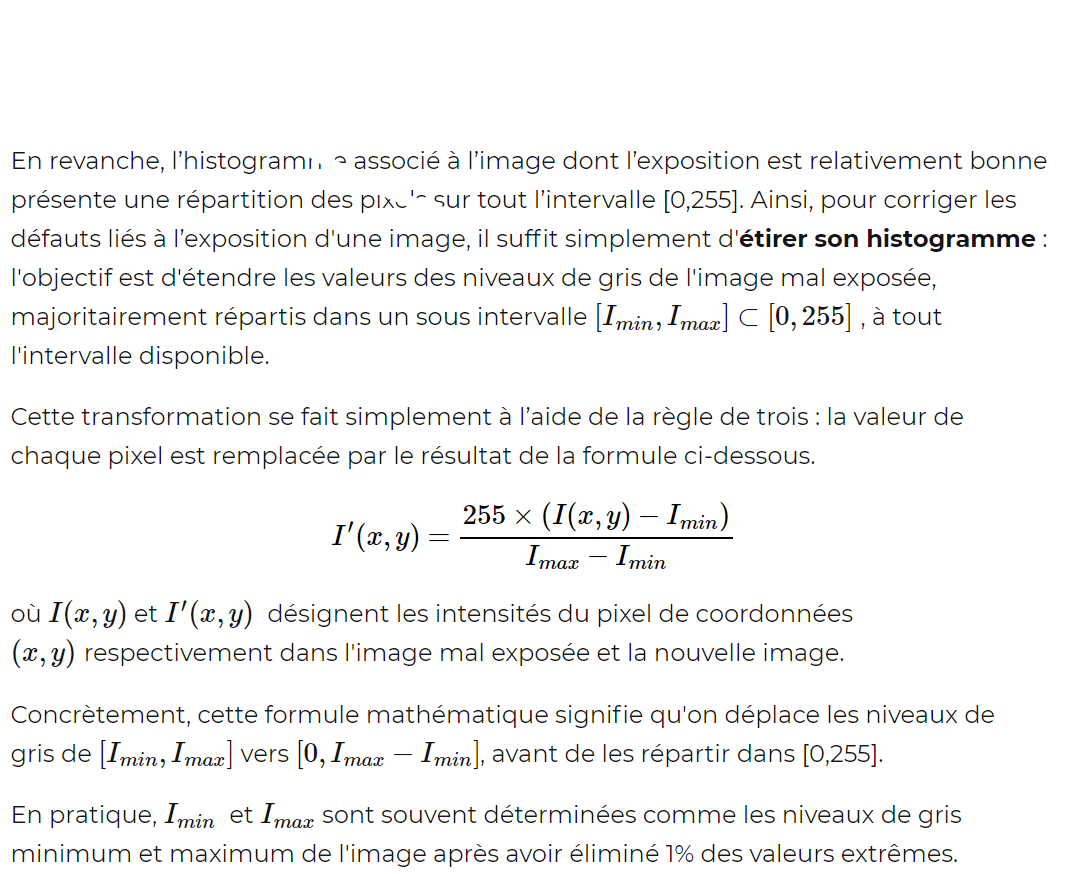

In [22]:
from IPython.display import Image
Image(filename="pictures/1.B.2.PNG")

L'étirement d'histogramme se fait avec la fonction **autocontrast** du module **ImageOps** de Pillow

**ImageOps.autocontrast(image, cutoff=0) => image**

Maximize (normalize) image contrast. This function calculates a histogram of the input image, removes cutoff percent of the lightest and darkest pixels from the histogram, and remaps the image so that the darkest remaining pixel becomes black (0), and the lightest becomes white (255).

In [37]:
from PIL import Image, ImageOps

# Charger l'image
original_img = Image.open("pictures/simba.PNG") 

autocontrast_image = ImageOps.autocontrast(original_img)
autocontrast_image.save("pictures/auto_contrast_applied_simba.png")

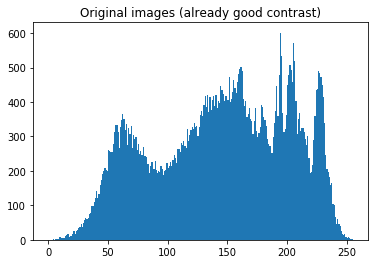

In [41]:
img = np.array(Image.open('pictures/simba.png'))

n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.title('Original images (already good contrast)')
plt.show()

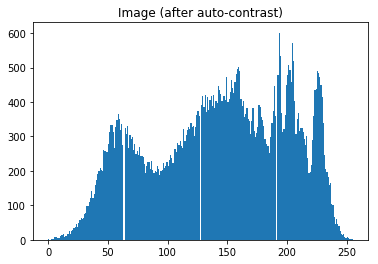

In [42]:
img = np.array(Image.open('pictures/auto_contrast_applied_simba.png'))

n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.title('Image (after auto-contrast)')
plt.show()

### Egalisation d'histogrammes

**Quand l'utiliser ?**: **l'amélioration du contraste de l'image**.

Le **contraste** caractérise **la répartition de lumière dans une image** : plus une image est contrastée, plus **la différence de luminosité entre ses zones claires et sombres est importante**. 

En général, une image peu contrastée est terne, tandis qu'une image trop contrastée est visuellement "agressive". Dans les deux cas, l'image manque de clarté car certains de ses détails seront peu, voire pas du tout, visibles.

L'égalisation d'histogrammes est une technique simple permettant de **réajuster le contraste d'une image et ainsi de lui redonner du peps ou de l'adoucir**. Pour comprendre de manière intuitive le fonctionnement de ce traitement, étudions l'allure de l'histogramme pour des images peu ou trop contrastées :

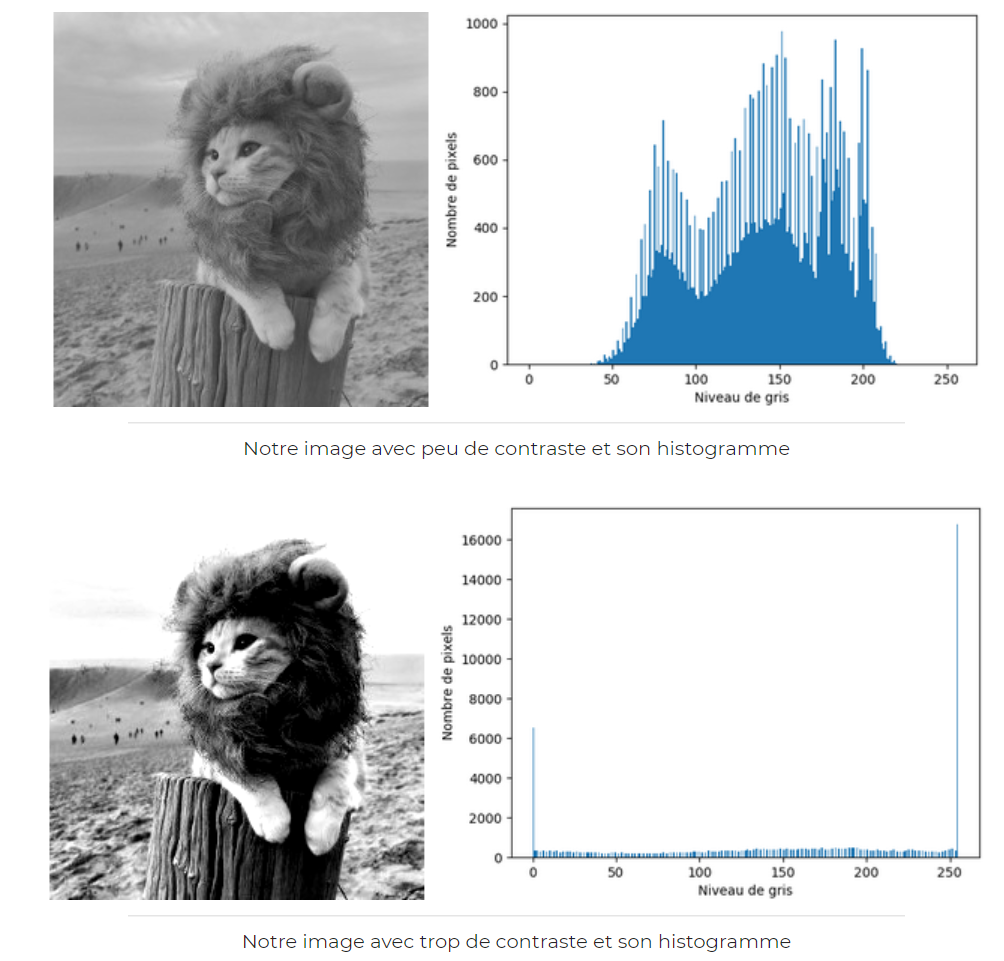

In [43]:
from IPython.display import Image
Image(filename="pictures/1.B.3.PNG")